In [6]:
import pandas as pd
import numpy as np
import folium

In [7]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [48]:
data = pd.read_csv("C:/Users/renz/Downloads/day_interval_out.csv")
data['LON'] = data['LON'].apply(lambda x : (x - 360) if x>0 else x )

In [49]:
data1 = data

In [542]:
data = pd.read_csv("C:/Users/renz/Downloads/hour_interval_out.csv")
data['LON'] = data['LON'].apply(lambda x : (x - 360) if x>0 else x )
data1 = data

In [567]:
data1.groupby('MMSI2')['LON'].count()

MMSI2
209087000_10     1287
209087000_4       249
209087000_8       891
209251000_20      717
209251000_31      116
209540000_49      223
209550000_20      200
209550000_59      161
209735000_42      181
210161000_11      319
210161000_12      643
210161000_13      639
210161000_14      622
210161000_21      694
210161000_22      614
210161000_23      269
210161000_24      423
210242000_14      931
210242000_22      554
210242000_23      926
210242000_25      537
210242000_26      987
210242000_30     1012
210242000_31      954
210242000_33      971
210242000_35     1010
210296000_56      489
210562000_61     1094
210562000_62      188
210562000_65       83
                 ... 
636092489_29      520
636092489_32      445
636092489_33      957
636092489_34      478
636092489_36      359
636092489_38     1019
636092489_39      438
636092489_45      434
636092587_32      841
636092587_45      376
636092627_51      578
636092764_11      272
636092786_4       921
636092792_17      446
6360

In [665]:
# L1 = pd.DataFrame()
L1 = list()
for i,j in zip(data1['MMSI2'].unique(), data1.groupby('MMSI2')['LON'].count()):
    for k in range(0, 101, 1):
        k = k/100
        if int(round(j*k)) == 0:
            L2 = list()
            L2.extend(list(data1[data1['MMSI2'] == i][['MMSI2', 'LAT', 'LON']].reset_index()[['MMSI2', 'LAT', 'LON']].loc[0, :]))
        else:
            L2.extend(list(data1[data1['MMSI2'] == i][['LAT', 'LON']].reset_index()[['LAT', 'LON']].loc[int(round(j*k))-1, :]))
#     L2 = np.transpose(pd.DataFrame(L2))
#     L1 = pd.concat([L1, L2])
    L1.append(L2)
    print(i)
#     if i == '209087000_4':
#         break
    
    

209087000_10
209087000_4
209087000_8
209251000_20
209251000_31
209540000_49
209550000_20
209550000_59
209735000_42
210161000_11
210161000_12
210161000_13
210161000_14
210161000_21
210161000_22
210161000_23
210161000_24
210242000_14
210242000_22
210242000_23
210242000_25
210242000_26
210242000_30
210242000_31
210242000_33
210242000_35
210296000_56
210562000_61
210562000_62
210562000_65
210562000_68
210562000_69
210562000_71
210567000_59
210905000_17
210905000_24
210905000_33
210905000_34
210905000_35
211264450_10
211264450_14
211264450_9
211311970_27
211367460_52
211367460_70
211367460_77
211378110_11
211378110_13
211782000_25
211782000_52
212232000_29
212276000_29
212347000_14
212347000_29
212348000_12
212350000_10
212350000_11
212350000_12
212350000_13
212351000_48
212353000_39
212353000_9
212355000_50
212355000_57
212355000_67
212714000_65
212714000_68
212714000_69
212714000_70
212714000_71
215381000_10
215381000_11
215381000_13
215381000_2
215381000_9
218352000_19
218643000_61
21867

356352000_38
356352000_40
356352000_42
356352000_43
356352000_45
356352000_46
356352000_49
356352000_55
356481000_48
356481000_53
356552000_40
356565000_17
356565000_31
356565000_35
356565000_39
356581000_23
356581000_43
356581000_44
356581000_48
356581000_58
356581000_59
356581000_63
356581000_67
356581000_68
356798000_3
356872000_49
356872000_50
356872000_51
356872000_52
356872000_53
356872000_54
356872000_55
356872000_61
356957000_54
356957000_55
356957000_59
356957000_70
357051000_78
357067000_16
357096000_36
357104000_87
357363000_13
357405000_16
357493000_13
357502000_88
357539000_79
357547000_17
357547000_21
357547000_55
357547000_56
357547000_9
357770000_24
357770000_30
357874000_14
357874000_27
357926000_26
357926000_31
357926000_37
357926000_49
357926000_74
357926000_76
366576000_1
366576000_11
366576000_12
366576000_16
366576000_2
366576000_25
366576000_3
366576000_44
366576000_7
367438000_12
367438000_17
367438000_2
367438000_24
367438000_25
367438000_29
367438000_30
367438

477192900_33
477192900_36
477193400_42
477193400_43
477207400_27
477218400_10
477219400_8
477220400_29
477222600_21
477222600_22
477257100_12
477257100_13
477257100_14
477257100_24
477257100_47
477257100_50
477257100_54
477257100_66
477257100_67
477271300_14
477271300_18
477271300_44
477271300_49
477271300_53
477271300_72
477271300_76
477271900_60
477271900_61
477274900_19
477276600_16
477276600_60
477276600_64
477276600_67
477276600_69
477276600_70
477276600_73
477276600_77
477282900_38
477282900_49
477282900_54
477282900_68
477293900_16
477293900_17
477293900_47
477293900_48
477293900_51
477293900_52
477293900_53
477293900_54
477293900_55
477293900_56
477293900_70
477293900_74
477300500_30
477307400_41
477307400_47
477314100_13
477314100_29
477314100_55
477314100_61
477314100_9
477315000_38
477315000_39
477316000_2
477316000_33
477316000_37
477316000_38
477316000_39
477346500_27
477346500_34
477348300_41
477351100_1
477351100_15
477351100_17
477390400_18
477390400_19
477390400_3
4774

636014997_50
636014997_52
636014997_59
636014997_60
636014997_64
636015182_44
636015182_47
636015182_52
636015182_56
636015182_63
636015183_22
636015496_37
636015496_38
636015496_39
636015496_40
636015496_43
636015496_44
636015496_45
636015496_46
636015496_47
636015496_51
636015506_40
636015506_47
636015515_46
636015515_62
636015604_68
636015607_86
636015659_18
636015659_20
636015659_25
636015659_26
636015659_27
636015659_31
636015659_8
636015660_16
636015660_17
636015660_18
636015660_19
636015660_24
636015660_30
636015660_34
636015660_8
636015660_9
636015743_32
636015743_37
636015743_38
636015743_43
636015743_48
636015744_59
636015744_61
636015744_62
636016038_18
636016038_21
636016125_2
636016200_11
636016200_12
636016200_3
636016200_53
636016200_55
636016200_9
636016201_14
636016201_18
636016201_20
636016201_3
636016204_43
636016206_15
636016242_16
636016307_71
636016415_69
636016667_45
636016853_28
636017034_7
636017118_38
636017153_33
636017153_48
636017154_5
636017155_25
63601715

In [669]:
L1 = pd.DataFrame(L1)
L1.iloc[[119,120,121,384,1369],201] = L1.iloc[[119,120,121,384,1369],199]
L1.iloc[[119,120,121,384,1369],202] = L1.iloc[[119,120,121,384,1369],200]

In [729]:
data10 = L1.iloc[:, 1:]

In [744]:
X = np.array(data10)
kmeans = KMeans(n_clusters=30, random_state=0).fit(X)

In [745]:
data2 = data1['MMSI2'].unique()
data2 = pd.DataFrame({'MMSI2' : data2, 'cluster' : kmeans.labels_})

In [746]:
data3 = pd.merge(data1, data2, how='left', on=['MMSI2'])

C:\tools\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


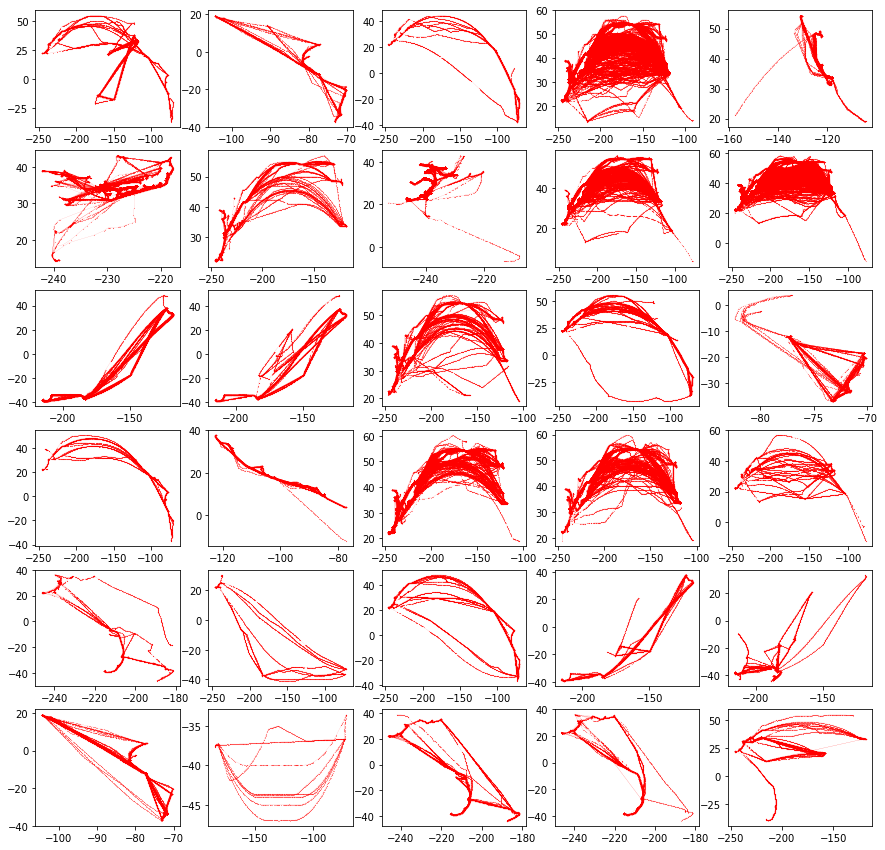

In [747]:
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
L = data3['cluster'].unique()

plt.figure(figsize=(15, 15))
for i, j in enumerate(L):
    data_cluster = data3[data3['cluster'] == j][['MMSI2', 'LAT', 'LON']]
    L2 = data_cluster['MMSI2'].unique()
    
    for k in L2:
        plt.subplot(6, 5, i+1)
        plt.plot(data_cluster[data_cluster['MMSI2'] == k]['LON'], 
                 data_cluster[data_cluster['MMSI2'] == k]['LAT'], 
                 'rs--', linewidth = .1, markersize = .1)

plt.show()

In [679]:
# a = data1.groupby('MMSI2')[['LAT', 'LON']].var()
# b = data1.groupby('MMSI2')[['LAT', 'LON']].mean()
c = data1.groupby('MMSI2')['LAT'].first()
# e = data1.groupby('MMSI2')['LAT'].percentile(1)
d = data1.groupby('MMSI2')['LAT'].last()
# e = data1.groupby('MMSI2')['LAT'].quantile(.1)
# f = data1.groupby('MMSI2')['LAT'].quantile(.2)
# g = data1.groupby('MMSI2')['LAT'].quantile(.3)
# h = data1.groupby('MMSI2')['LAT'].quantile(.4)
# i = data1.groupby('MMSI2')['LAT'].quantile(.5)
# j = data1.groupby('MMSI2')['LAT'].quantile(.6)
# k = data1.groupby('MMSI2')['LAT'].quantile(.7)
# l = data1.groupby('MMSI2')['LAT'].quantile(.8)
# m = data1.groupby('MMSI2')['LAT'].quantile(.9)
c2 = data1.groupby('MMSI2')['LON'].first()
d2 = data1.groupby('MMSI2')['LON'].last()
# e2 = data1.groupby('MMSI2')['LON'].quantile(.1)
# f2 = data1.groupby('MMSI2')['LON'].quantile(.2)
# g2 = data1.groupby('MMSI2')['LON'].quantile(.3)
# h2 = data1.groupby('MMSI2')['LON'].quantile(.4)
# i2 = data1.groupby('MMSI2')['LON'].quantile(.5)
# j2 = data1.groupby('MMSI2')['LON'].quantile(.6)
# k2 = data1.groupby('MMSI2')['LON'].quantile(.7)
# l2 = data1.groupby('MMSI2')['LON'].quantile(.8)
# m2 = data1.groupby('MMSI2')['LON'].quantile(.9)

In [680]:
# X = np.array(pd.concat([c,d,e,f,g,h,i,j,k,l,m,n], axis=1, join_axes=[data2.index]))
# X = np.array(pd.concat([c,d,e,f,g,h,i,j,k,l,m,c2,d2,e2,f2,g2,h2,i2,j2,k2,l2,m2], axis = 1))
X = np.array(pd.concat([c,d,c2,d2], axis = 1))
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [485]:
data2 = pd.DataFrame({'MMSI2' : data2['MMSI2'].unique(), 'cluster' : kmeans.labels_})

In [486]:
data3 = pd.merge(data1, data2, how='left', on=['MMSI2'])

In [487]:
# plt.figure(figsize=(15, 10))
# color_num = 50
# plt.scatter(data3['LON'], data3['LAT'], c = data3['cluster'], cmap = plt.cm.get_cmap('rainbow', color_num), s = 0.1, marker='o')

C:\tools\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


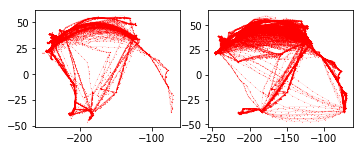

In [488]:
# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
L = data3['cluster'].unique()

plt.figure(figsize=(15, 15))
for i, j in enumerate(L):
    data_cluster = data3[data3['cluster'] == j][['MMSI2', 'LAT', 'LON']]
    L2 = data_cluster['MMSI2'].unique()
    
    for k in L2:
        plt.subplot(6, 5, i+1)
        plt.plot(data_cluster[data_cluster['MMSI2'] == k]['LON'], 
                 data_cluster[data_cluster['MMSI2'] == k]['LAT'], 
                 'rs--', linewidth = .1, markersize = .1)

plt.show()

# DBSCAN으로 outlier 제거

In [ ]:
import collections

In [260]:
data = pd.read_csv("C:/Users/renz/Downloads/hour_interval_out.csv")
data['LON'] = data['LON'].apply(lambda x : (x - 360) if x>0 else x )
data1 = data

In [261]:
X = data1[['MMSI2', 'LAT', 'LON']]

In [262]:
MMSI2 = X['MMSI2'].unique()

In [258]:
X1 = StandardScaler().fit_transform(X[X['MMSI2']==MMSI2[0]][['LAT', 'LON']])

In [259]:
# Compute DBSCAN
db = DBSCAN(eps=.5, min_samples=1).fit(X1)

In [263]:
X = data1[['MMSI2', 'LAT', 'LON']]
MMSI2 = X['MMSI2'].unique()
L = []
L1 = []

for i in range(len(MMSI2)):
    X1 = StandardScaler().fit_transform(X[X['MMSI2']==MMSI2[i]][['LAT', 'LON']])
    db = DBSCAN(eps=.5, min_samples=1).fit(X1)
    L.append(set(db.labels_))
    L1.append(collections.Counter(db.labels_))

In [354]:
A = pd.DataFrame({'MMSI2' : MMSI2, 'L' : L, 'L_counts' : L1})
A = A[A['L'] != {0}]

In [368]:
new_data = data[data['MMSI2'].apply(lambda x: x not in list(A['MMSI2']))]

In [371]:
new_data.to_csv('C:/Users/renz/Downloads/new_data.csv', encoding='utf-8')

In [325]:
X1 = StandardScaler().fit_transform(X[X['MMSI2'] == '209550000_39'][['LAT', 'LON']])

In [326]:
db = DBSCAN(eps=.5, min_samples=1).fit(X1)

In [327]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

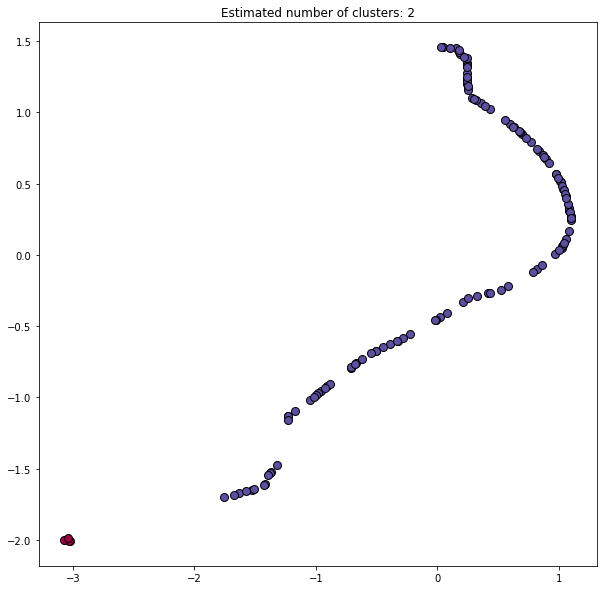

In [328]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 여기까지 DBSCAN

경로가 중간에 사라지는 백색지역이나, AIS데이터의 수집과정에서 손실 및 기타 어떠한 이유로 제거 되었을 때, 경로를 100% 파악할 수 없다.
그러나 사후분포를 계산하여 경로를 복원할 수 있고, 도착시간을 더 정확하게 예측할 수 있다.